### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [103]:
data = pd.read_csv('data/coupons.csv')

In [104]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [105]:
# Examine the size of the data set along with a general sense of how much is missing
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [106]:

# Observations from data.info() above:
# Many columns have no missing data since their non-Null count = RangeIndex
# The 'car' column is mostly null so unlikely it can be used.
# Some missing data: Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50


In [107]:

# Let's see if there are any rows with empty strings:
total_empty_rows = (data == '').any(axis=1).sum()
print()
print("Rows with at least one empty string:", total_empty_rows)
print()


Rows with at least one empty string: 0



In [108]:

# Let's see what unique values lie in each column to spot problematic data

# Loop through every column
for col in data.columns:
    unique_vals = data[col].unique()
    n_unique = data[col].nunique(dropna=False)

    # Print the column name and a total number of distinct/different values
    print(f"\nColumn: {col}")
    print(f"Number of distinct values (including NaN): {n_unique}")

    # If the number of unique values are more than 10 then print a sample of 10,
    # otherwise print all the values up to an including 10 of them
    if n_unique <= 10:
        print("ALL values:", unique_vals)
    else:
        print("10 sample values:", unique_vals[:10])



Column: destination
Number of distinct values (including NaN): 3
ALL values: ['No Urgent Place' 'Home' 'Work']

Column: passanger
Number of distinct values (including NaN): 4
ALL values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Column: weather
Number of distinct values (including NaN): 3
ALL values: ['Sunny' 'Rainy' 'Snowy']

Column: temperature
Number of distinct values (including NaN): 3
ALL values: [55 80 30]

Column: time
Number of distinct values (including NaN): 5
ALL values: ['2PM' '10AM' '6PM' '7AM' '10PM']

Column: coupon
Number of distinct values (including NaN): 5
ALL values: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Column: expiration
Number of distinct values (including NaN): 2
ALL values: ['1d' '2h']

Column: gender
Number of distinct values (including NaN): 2
ALL values: ['Female' 'Male']

Column: age
Number of distinct values (including NaN): 8
ALL values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Column: maritalS

In [109]:

# Examining the values for the columns with missing values:
#    'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50'
# This reveals that there is a 'never' value so we can see that the missing values
# are not because the customer never visit those places. Nor it it that the customer
# visited them more than the max because there is a category for 'Greater than 8' (gt8).
# Therefore they appear to be customers not asnwering the question or a glitch
# in collecting the values. We can't effecively subsitute in a value.
# 
# It is important to note what these columns are. Since they tell is how often people
# use the faclilites that the coupons are actually for, it seems like crucial data
# for finding a predictive model. The model will most likely need these columns.
#
# Let's see how many rows would be lost if the rows with NaN values were removed.
# Not counting the 'car' column which has so few entries.
# Let's do a general code,
# though we can see from direct observation that the columns with issues are:
# 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50'

cols = data.columns.difference(['car'])
rows_with_nan = data[data[cols].isnull().any(axis=1)]
print("Rows that would be lost:", len(rows_with_nan))

# What percentage of the total rows would be removed?
percent_lost = (len(rows_with_nan) / len(data)) * 100
print()
print(f"Percentage of rows lost: {percent_lost:.2f}%")
print()

Rows that would be lost: 605

Percentage of rows lost: 4.77%



In [110]:
# OBSERVATIONS:
#  Only occupation has more than 10 distinct values (ie 25).
#  so let's see what they all are so as to check for issues

unique_occupation_vals = data["occupation"].unique()
print(f"\nColumn: Occupation")
print("ALL values:", unique_occupation_vals)


Column: Occupation
ALL values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [111]:

# CONCLUSION so far to missing and problematic data:
# A. Car column cannot be effectively used - too few values.
# B. There are no empty strings ('') in the data.
# C. Statistical outliers with wildly different values do not appear to
#    be an issue, because the range of values is not large in each column.
#    This can be seen just briefly looking down the unique values output.
# D. Only occupation has more than 10 distinct values (ie 25).
# E. Every other column has less than 10 distinct values
# F. Looking at all the distinct values tells us that ...
#    - there's no mess like embeded footnote markers (eg. [23] from Wikipedia)    
#    - no others are problematic except the for the columns with NaN
#    that we noted before:
#     Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50




3. Decide what to do about your missing data -- drop, replace, other...

In [112]:

# DECISIONS ABOUT MISSING DATA ISSUES:

# A. Important columns that have missing data:
#       Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
#    Those columns will be important for seeing if a voucher helps customers
#    to go to one of these places again. We cannot do a suitable substitute
#    because seeing the other values shows the customer did not provide
#    an answer or the system failed to collect it. There is a value for 
#    'never' and greater than 8 times ('gt8').
# B. Therefore if we remove the 'car' column and then remove the rows with NaN
#    then we will only lose 4.77% of data rows which is quite minor.

# ACTIONS TO CLEAN UP DATA:
# Remove from our data frame the 'car' column (but not from the .csv file)

data = data.drop(columns=['car'])

# Remove from our data frame rows with no data.
# these missing values we have discovered is only in the crucial columns of:
#     Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
data = data.dropna()





4. What proportion of the total observations chose to accept the coupon?



In [113]:

# Proportion of 'Y' column being 'Yes':
proportion_accept = len(data[data['Y'] == 'Yes']) / len(data)

# Expressing this as a percentage to 2 decminal places:
print(f"Proportion who accepted the coupon: {proportion_accept:.2%}")


Proportion who accepted the coupon: 0.00%


5. Use a bar plot to visualize the `coupon` column.

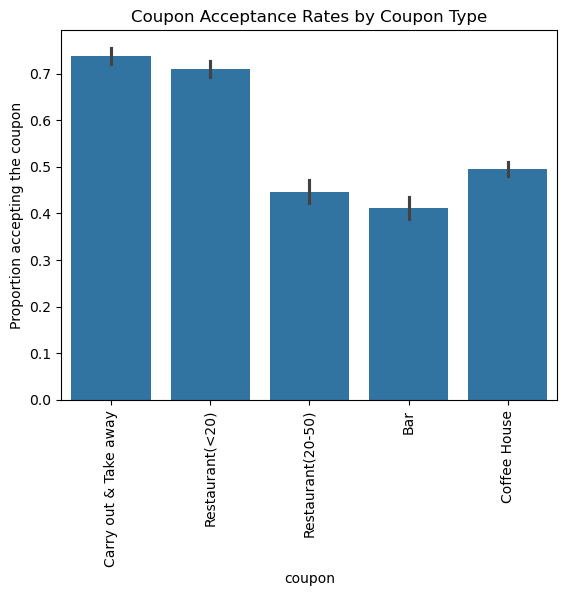

In [114]:

# Using Seaborn to plot the bar chart:
sns.barplot(
    x='coupon',  # X-Axis
    y='Y',       # Y-Axis
    data=data,
    # Without this 'order' below, the two restaurant columns were not adjacent:
    order=['Carry out & Take away',
           'Restaurant(<20)', 'Restaurant(20-50)',
           'Bar','Coffee House']
)
plt.xticks(rotation=90)   # The X-Axis labels overlapped without this rotation.
plt.ylabel("Proportion accepting the coupon")
plt.title("Coupon Acceptance Rates by Coupon Type")
plt.show()

In [115]:

# Observation:

# 'Carry out & Take away' and 'Restaurant(<20)' have the highest relative raw acceptance
#  without taking into account if other data increases this or decreased it.
#  A rate of over 0.7 seems quite high overall for acceptance.


6. Use a histogram to visualize the temperature column.

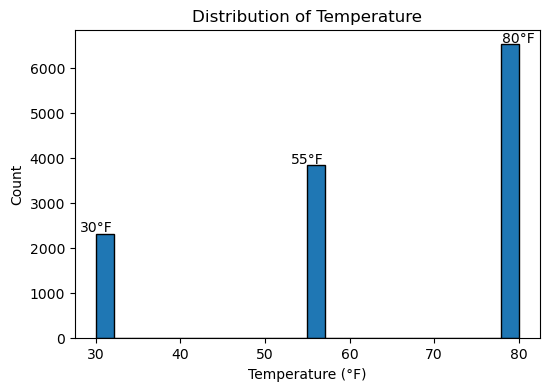

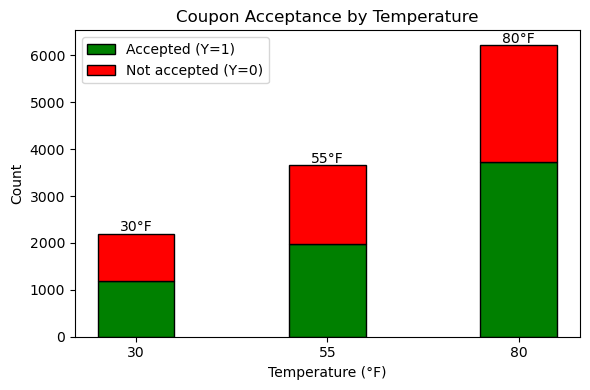

In [128]:

#-------------------------------------------------------------
#  Using Matplotlib to do the temperature histogram:
#-------------------------------------------------------------

# 1. Set the figure size
plt.figure(figsize=(6,4))

# 2. Create the histogram (automatic bins, black edges)
plt.hist(vals, bins='auto', edgecolor='black')

# 3. Add labels above each bar
# Note we know from the data investigation
# that there are only 3 distinct temperatures: 30,55,80
for t in vals.unique():      # Alernatively ... for t in [30, 55, 80]:
    count = (vals == t).sum()   
    plt.text(t, count + 50, f"{t}°F", ha='center')

# 4. Label the X-axis
plt.xlabel('Temperature (°F)')

# 5. Label the Y-axis
plt.ylabel('Count')

# 6. Add a title
plt.title('Distribution of Temperature')

# 7. Display the plot
plt.show()


#-------------------------------------------------------------
#  More informative graph with accpetance of the coupon included:
#-------------------------------------------------------------

# Count accepted and not accepted for each temperature
temps = [30, 55, 80]
accepted_counts = [(data['temperature'] == t).sum() for t in temps]
accepted_only = [(data[(data['temperature'] == t) & (data['Y'] == 1)].shape[0]) for t in temps]
rejected_only = [a - b for a, b in zip(accepted_counts, accepted_only)]

x = np.arange(len(temps))  # positions for bars
bar_width = 0.4             # narrower bars

plt.figure(figsize=(6,4))

# Accepted (lower part, green)
plt.bar(x, accepted_only, color='green', width=bar_width, label='Accepted (Y=1)', edgecolor='black')

# Not accepted (upper part, red)
plt.bar(x, rejected_only, bottom=accepted_only, color='red', width=bar_width, label='Not accepted (Y=0)', edgecolor='black')

# Add temperature labels above each total bar
for i, t in enumerate(temps):
    total = accepted_counts[i]
    plt.text(x[i], total + 50, f"{t}°F", ha='center')

plt.xticks(x, temps)
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Temperature')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# CONCLUSION REGARDING TEMPERATURE:
# Less people were out driving and doing the survey when it was below freezing.
# The most people were out when the temperature was pleasant 80°F (26.7 °C)
# When it was warmer, there were slightly more who accepted the coupon
# than at the colder temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [117]:

# Using a Boolean Mask to select just the rows where 'coupon' has 'Bar'

bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [118]:
# Having decided earlier to remove the rows with no values,
# I can now see that the result of this exercise below will quite
# probably be affected. So I may not match other students answers.
# However, when we get to the question 4 below, the missing values
# may well have skewed the result depending on how it is calculated
# and a decision might have needed to have been made anyway.

# Proportion of 'Y' column being 'Yes' for the bar_coupons data frame:
proportion_bar_accept = len(bar_coupons[bar_coupons['Y'] == 1]) / len(bar_coupons)

# Expressing this as a percentage to 2 decminal places:
print(f"Proportion who accepted the 'Bar' coupon: {proportion_bar_accept:.2%}")

Proportion who accepted the 'Bar' coupon: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [119]:
# Orirginal "ALL values for bar" : ['never' 'less1' '1~3' 'gt8' nan '4~8']
# I have removed the rows with missing data for 'bar' in the first section.

# 3 or fewer times a month
low_bar_use = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
low_accept = len(low_bar_use[low_bar_use['Y'] == 1]) / len(low_bar_use)

# More than 3 times a month
high_bar_use = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
high_accept = len(high_bar_use[high_bar_use['Y'] == 1]) / len(high_bar_use)

print()
print(f"Acceptance rate (≤3 bar visits/month): {low_accept:.2%}")
print(f"Acceptance rate (>3 bar visits/month): {high_accept:.2%}")
print()


Acceptance rate (≤3 bar visits/month): 37.27%
Acceptance rate (>3 bar visits/month): 76.17%



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [120]:
# Unfortunately there is an error in this question or a mismatch with the data,
# because the finest/narrowest breakdown of frequency to the bar is:
# either less than one (less1) and one to three (1~3).
# Therefore we cannot determine more than once a month,
# rather we would have to determine going to the bar 1 or more times per month.
# So the question should be:
# "Compare the acceptance rate between drivers who go to a bar once or more than once
#  a month and are over the age of 25 to the all others. Is there a difference?"
# 
# Secondly it is important to note that removing the cells with no data in 'Bar'
# is important before this calculation since comparing to "all others" is problematic
# if you have missing data in the 'Bar' column. So not deleting the rows with blanks
# would imply that the 'all other is larger' but in fact there are 'Bar' we simply do not know for the blank
# bar frequency.

# Drivers who go to a bar ONCE or more per month (1~3, 4~8, gt8) and are over 25
group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['age'].isin(['21', 'below21', '26']))
]
group1_accept = len(group1[group1['Y'] == 1]) / len(group1)

# All other drivers -
# This .drop() function works because I removed the rows with no values for 'Bar'.
# If those rows were not removed then .drop() would be counting empty values as
# though they had data (when they don't).
group2 = bar_coupons.drop(group1.index)
group2_accept = len(group2[group2['Y'] == 1]) / len(group2)

print(f"Acceptance rate (Bar ≥1/month & age>25): {group1_accept:.2%}")
print(f"Acceptance rate (All others): {group2_accept:.2%}")

Acceptance rate (Bar ≥1/month & age>25): 63.93%
Acceptance rate (All others): 37.87%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [121]:
# This is a badly worded question compared to the last question.
# What is missing is "to the all others". Without "to the all others" it sounds like 
#    we are to compare A 'AND' B 'AND' C where
#    A = "who go to bars more than once a month"
#    B = "had passengers that were not a kid"
#    C = "had occupations other than farming, fishing, or forestry"
# But I am assuming you meant:
#       drivers who meet A & B & C compared "to/with the all other drivers" 
# 
# As for the last question ...
# Unfortunately there is an error in this question or a mismatch with the data,
# because the finest/narrowest breakdown of frequency to the bar is:
# either less than one (less1) and one to three (1~3).
# Therefore we cannot determine more than once a month,
# rather we would have to determine going to the bar 1 or more times per month.
# So onc again below is for once a month bar visits or more etc etc.

# Group 3: bar visits ≥1/month, passenger not a kid, occupation not Farming/Fishing/Forestry
group3 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]
group3_accept = len(group3[group3['Y'] == 1]) / len(group3) if len(group3) else float('nan')

# Group 4: all others
group4 = bar_coupons.drop(group3.index)
group4_accept = len(group4[group4['Y'] == 1]) / len(group4) if len(group4) else float('nan')

print(f"Acceptance rate (Group 3 — ≥1/mo bar, no kids, non-Farm/Fish/Forestry): {group3_accept:.2%}")
print(f"Acceptance rate (Group 4 — all others):                                 {group4_accept:.2%}")

Acceptance rate (Group 3 — ≥1/mo bar, no kids, non-Farm/Fish/Forestry): 70.94%
Acceptance rate (Group 4 — all others):                                 29.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [122]:
The result for the code below does not add up to 100% and so seems to have an error:

Acceptance rate (Group 5 — meets any of the conditions): 58.71%
Acceptance rate (Group 6 — all others):                  29.99%

# This is a very badly worded question. It is not clear English unfortunately.
# Are those obscure 'OR's meant to be 'with'
#      ie compare acceptance rates for Line A 'WITH' Line B 'WITH' Line C?
# Whenever you have a sentence saying " Compare ... between ..." it needs to have two or more
#     things separated with 'with' - that need to be compared to each other.
# That question is not clear.
# So in English we do not say "compare A or B", we say compare "A with B".
# Or it Q6 looking for one acceptance rate that meets all the 'and's and 'or's
#   and then compare that to everyone who is not in that one highly specified set?
# Assuming it is the latter where we are comparing those that meet the full specifications to 
# everyone else, I will continue on that basis ...

# Third & fourth time this issue of "more than once a month" has been in a question. So ...

# So Question 6 should be ...
# Compare the acceptance rates between those drivers who:
# go to bars ONCE A MONTH OR MORE , had passengers that were not a kid, and were not widowed OR
# go to bars ONCE A MONTH OR MORE and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.

# So the code:
# Group 5: drivers who satisfy ANY (based on the 'or') of these:
# 1) go to bars ≥1/month, passengers not a kid, and not widowed
# 2) go to bars ≥1/month and are under 30
# 3) go to cheap restaurants (>4x/month) and income <50K
group5 = bar_coupons[
    (
        (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
        (bar_coupons['passanger'] != 'Kid(s)') &
        (bar_coupons['maritalStatus'] != 'Widowed')
    )
    |
    (
        (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
        (bar_coupons['age'].isin(['21', '26', 'below21']))
    )
    |
    (
        (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
        (bar_coupons['income'].isin([
            'Less than $12500', '$12500 - $24999',
            '$25000 - $37499', '$37500 - $49999'
        ]))
    )
]

group5_accept = len(group5[group5['Y'] == 1]) / len(group5) if len(group5) else float('nan')

# Group 6: all others
group6 = bar_coupons.drop(group5.index)
group6_accept = len(group6[group6['Y'] == 1]) / len(group6) if len(group6) else float('nan')

print(f"Acceptance rate (Group 5 — meets any of the conditions): {group5_accept:.2%}")
print(f"Acceptance rate (Group 6 — all others):                {group6_accept:.2%}")


Acceptance rate (Group 5 — meets any of the conditions): 58.71%
Acceptance rate (Group 6 — all others):                29.99%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [124]:
# Investigating the Bar Coupons:

# From Q2:
#         Proportion who accepted the 'Bar' coupon: 41.19%
# CONCLUSION:
# From this, we get an overall base number to compare the figures below
#
# From Q3:
#         Acceptance rate (≤3 bar visits/month): 37.27%
#         Acceptance rate (>3 bar visits/month): 76.17%
# CONCLUSION:
# From this, we see a quite high rate of 76.17% among those who already
# frequent a bar more than three times a month.
# This is a strong indicator or likeliness to accept the coupon.
#
# From Q4:
#         Acceptance rate (Bar ≥1/month & age>25): 63.93%
#         Acceptance rate (All others): 37.87%
# CONCLUSION:
# From this, we see a higher rate than the base for going to the bar
# once a month or more and being over 25. This is less than
# This is less than for Q3 where the frequency or bar visits is more than 3.
# Adding in the over 25 makes it hard to compare to other to the other figures.
# The age may lower or increase the rate. We would want to see a figure 
# without that age category to see if it goes up or down.
#
# From Q5:
#         Acceptance rate (Group 3 — ≥1/mo bar, no kids, non-Farm/Fish/Forestry): 70.94%
#         Acceptance rate (Group 4 — all others):                                 29.79%
# CONCLUSION: 
# What we see in these two figures is that the first also has people who are at the bar once 
# a month or more and yet the figure is higher than Q4 (also once a month or more).
# Not having kids in the car who can't attend the bar (on that trip) makes sense.
# Also farmers/fishermen/forestry have long distances and so this may potentially
# lower acceptance rate but it is hard to tell when so many values are
#
#
# OVERALL CONCLUSION to 'Bar' attendance data:
# The regular bar attendance of more than 3 visits is the most significant
# predictor or whether a coupon for a bar will be accepted.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# Determining which coupons to investigate
# I want to see the correlation for each business type
# according to frequency of use of the business:

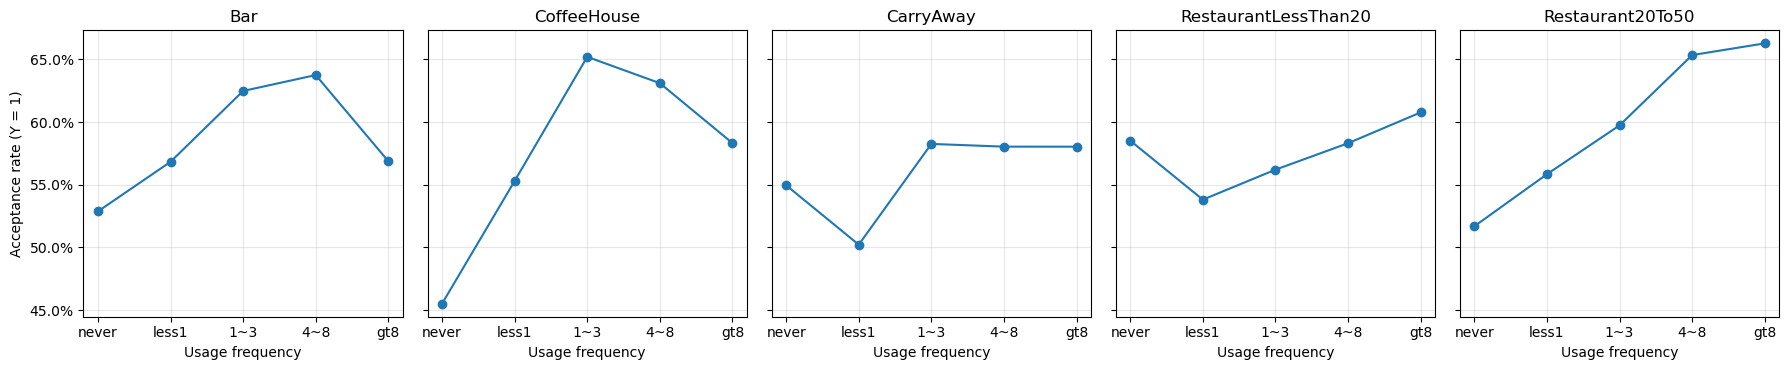

In [130]:
from pandas.api.types import CategoricalDtype
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1) Ordered categories
freq_order = ['never', 'less1', '1~3', '4~8', 'gt8']
cat_type = CategoricalDtype(categories=freq_order, ordered=True)

cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for c in cols:
    data[c] = data[c].astype(cat_type)

# 2) Plot 5 line graphs: x = ordered frequency, y = P(Y==1)
fig, axes = plt.subplots(1, 5, figsize=(18, 3.8), sharey=True)

for ax, c in zip(axes, cols):
    # compute acceptance rate per level
    grp = data.groupby(c)['Y']
    accepted = grp.apply(lambda s: (s == 1).sum())
    total = grp.size()
    rates = (accepted / total).reindex(freq_order)

    ax.plot(freq_order, rates.values, marker='o')
    ax.set_title(c)
    ax.set_xlabel('Usage frequency')
    ax.grid(alpha=0.3)

axes[0].set_ylabel('Acceptance rate (Y = 1)')
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # show as %
plt.tight_layout()
plt.show()

In [131]:
# It is interesting to note the drop in coupon acceptance for the bar when 
# frequency is Greater than 8 times. Just going off the earlier investigation,
# we might have thought that high frequency is a good predictor.
# For greater restaurant usage then is greater coupon acceptance
# especially for the more expensive Restaurants (last graph)
# New Direction to investigate: 
# I want to further investigate 'Restaurant20To50'

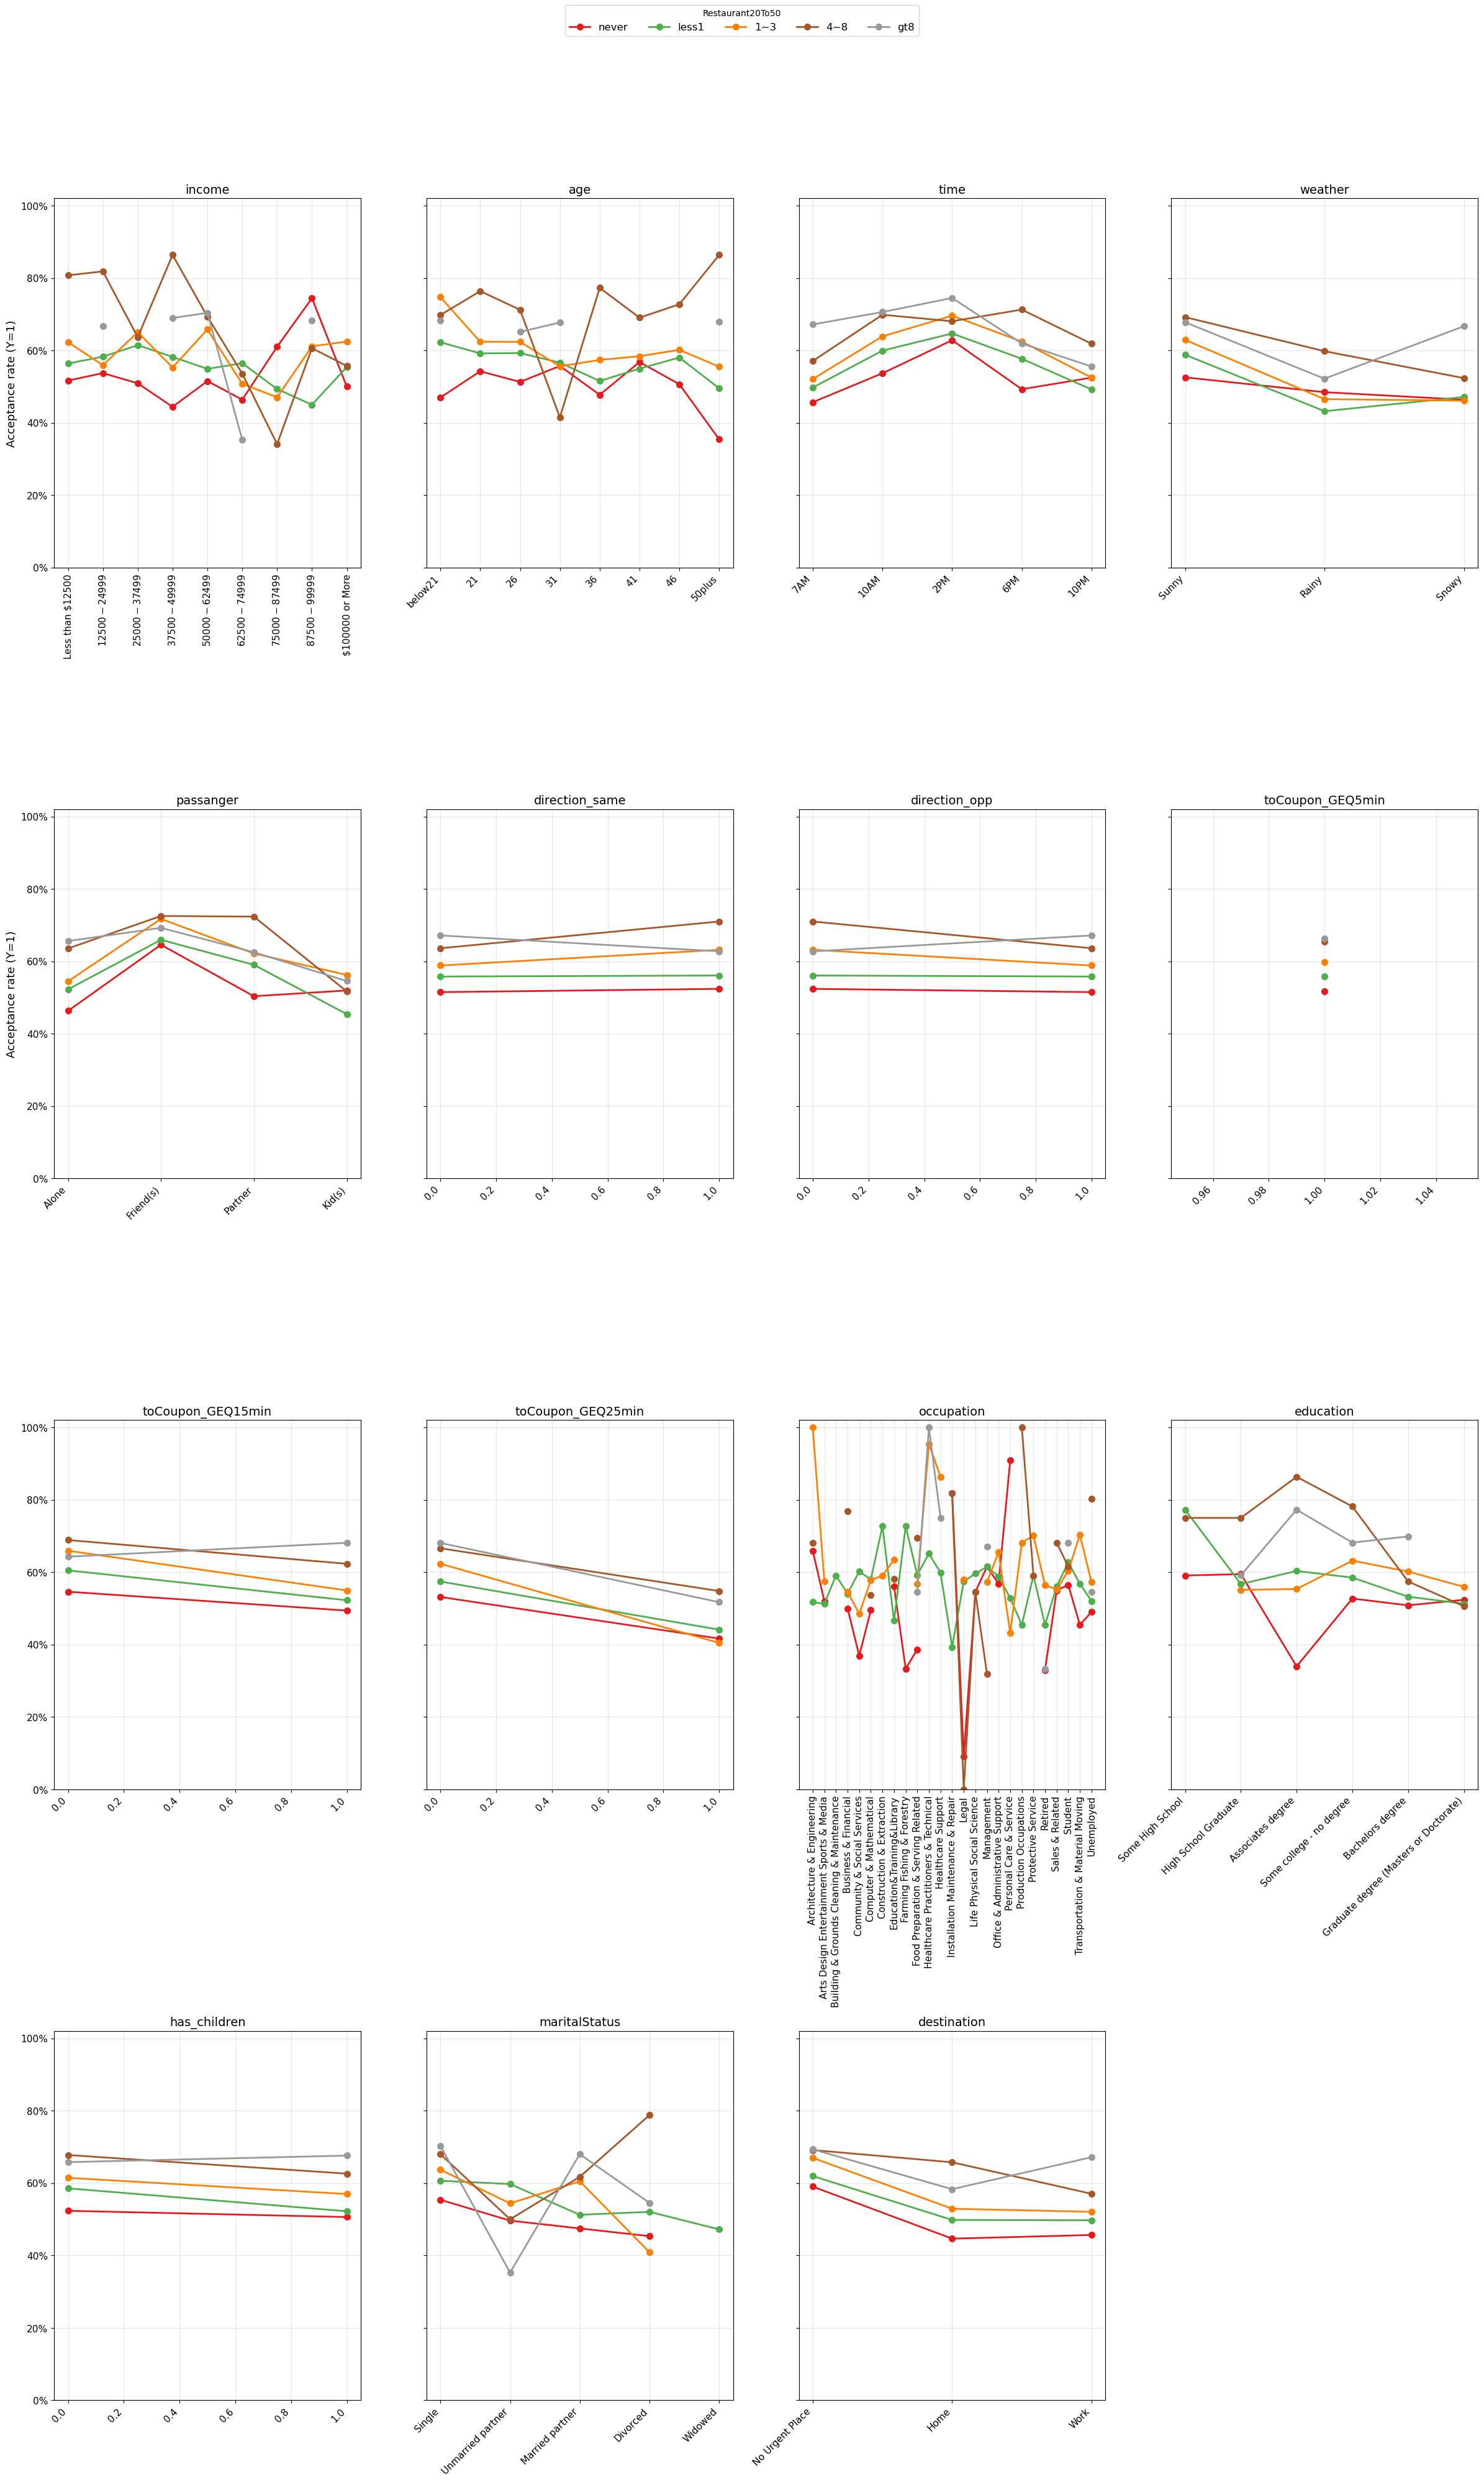

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pandas.api.types import CategoricalDtype

# --- Ordered category definitions ---
freq_order = ['never','less1','1~3','4~8','gt8']
income_order = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
    '$100000 or More'
]
age_order = ['below21','21','26','31','36','41','46','50plus']
time_order = ['7AM','10AM','2PM','6PM','10PM']
weather_order = ['Sunny','Rainy','Snowy']
pass_order = ['Alone','Friend(s)','Partner','Kid(s)']
edu_order = ['Some High School','High School Graduate','Associates degree',
             'Some college - no degree','Bachelors degree',
             'Graduate degree (Masters or Doctorate)']
marital_order = ['Single','Unmarried partner','Married partner','Divorced','Widowed']
dest_order = ['No Urgent Place', 'Home', 'Work']  # from your unique-values print

orders = {
    'income': income_order,
    'age': age_order,
    'time': time_order,
    'weather': weather_order,
    'passanger': pass_order,
    'direction_same': [0,1],
    'direction_opp': [0,1],
    'toCoupon_GEQ5min': [0,1],
    'toCoupon_GEQ15min': [0,1],
    'toCoupon_GEQ25min': [0,1],
    'occupation': sorted(data['occupation'].dropna().unique()),
    'education': edu_order,
    'has_children': [0,1],
    'maritalStatus': marital_order,
    'destination': dest_order,          # ← added
}

# Ensure ordered categoricals (only for string-typed ordered lists)
for c, order in orders.items():
    if c in data.columns and (len(order) == 0 or isinstance(order[0], str)):
        data[c] = data[c].astype(CategoricalDtype(categories=order, ordered=True))

# Variables to plot (now includes destination)
to_plot = [(col, orders[col]) for col in orders if col in data.columns]

# --- MUCH TALLER FIGURE ---
rows, cols = 4, 4   # 16 panels; we’ll hide any extras if fewer variables
fig, axes = plt.subplots(rows, cols, figsize=(24, 40), sharey=True)
axes = axes.ravel()
colors = plt.cm.Set1(np.linspace(0, 1, len(freq_order)))

for ax, (col, order) in zip(axes, to_plot):
    for i, level in enumerate(freq_order):
        subset = data[data['Restaurant20To50'] == level]
        if subset.empty:
            continue
        grp = subset.groupby(col)['Y']
        rate = (grp.apply(lambda s: (s == 1).sum()) / grp.size()).reindex(order)
        ax.plot(order, rate.values, marker='o', linewidth=2, markersize=7,
                color=colors[i], label=level)

    ax.set_title(col, fontsize=14)
    ax.grid(alpha=0.3)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim(0, 1.02)
    ax.tick_params(labelsize=11)

# Rotate x labels
for ax in axes:
    title = ax.get_title()
    for lbl in ax.get_xticklabels():
        if title in ['income','occupation']:
            lbl.set_rotation(90); lbl.set_ha('center')
        else:
            lbl.set_rotation(45); lbl.set_ha('right')

# Label axes, legend, and layout
if len(axes) > 0:
    axes[0].set_ylabel('Acceptance rate (Y=1)', fontsize=13)
if len(axes) > cols:
    axes[cols].set_ylabel('Acceptance rate (Y=1)', fontsize=13)

# Hide any unused panels
for i in range(len(to_plot), len(axes)):
    axes[i].axis('off')

fig.legend(freq_order, title="Restaurant20To50", loc='upper center', ncol=5, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [ ]:
# Noteworthy Patterns observed:

# 1. There is a very slight increase in coupon uptake when travelling
# in the same direction. Thie is very minimal.
# 2. When travelling with friends, there is a slight patten of higher
# coupon uptake.
# 3. Sunny gets more coupons accepted than rainy and snowing reduces
#   uptake in most cases.
# 4. There is a slight increase at 2pm compared to other times.
# 5. There is less uptake the greater the distance as shown by
#    toCoupon_GEQ15min and compared to toCoupon_GEQ25min
# 6. Having destination as 'No urgent place' generally sees higher uptake.


Missing columns: []


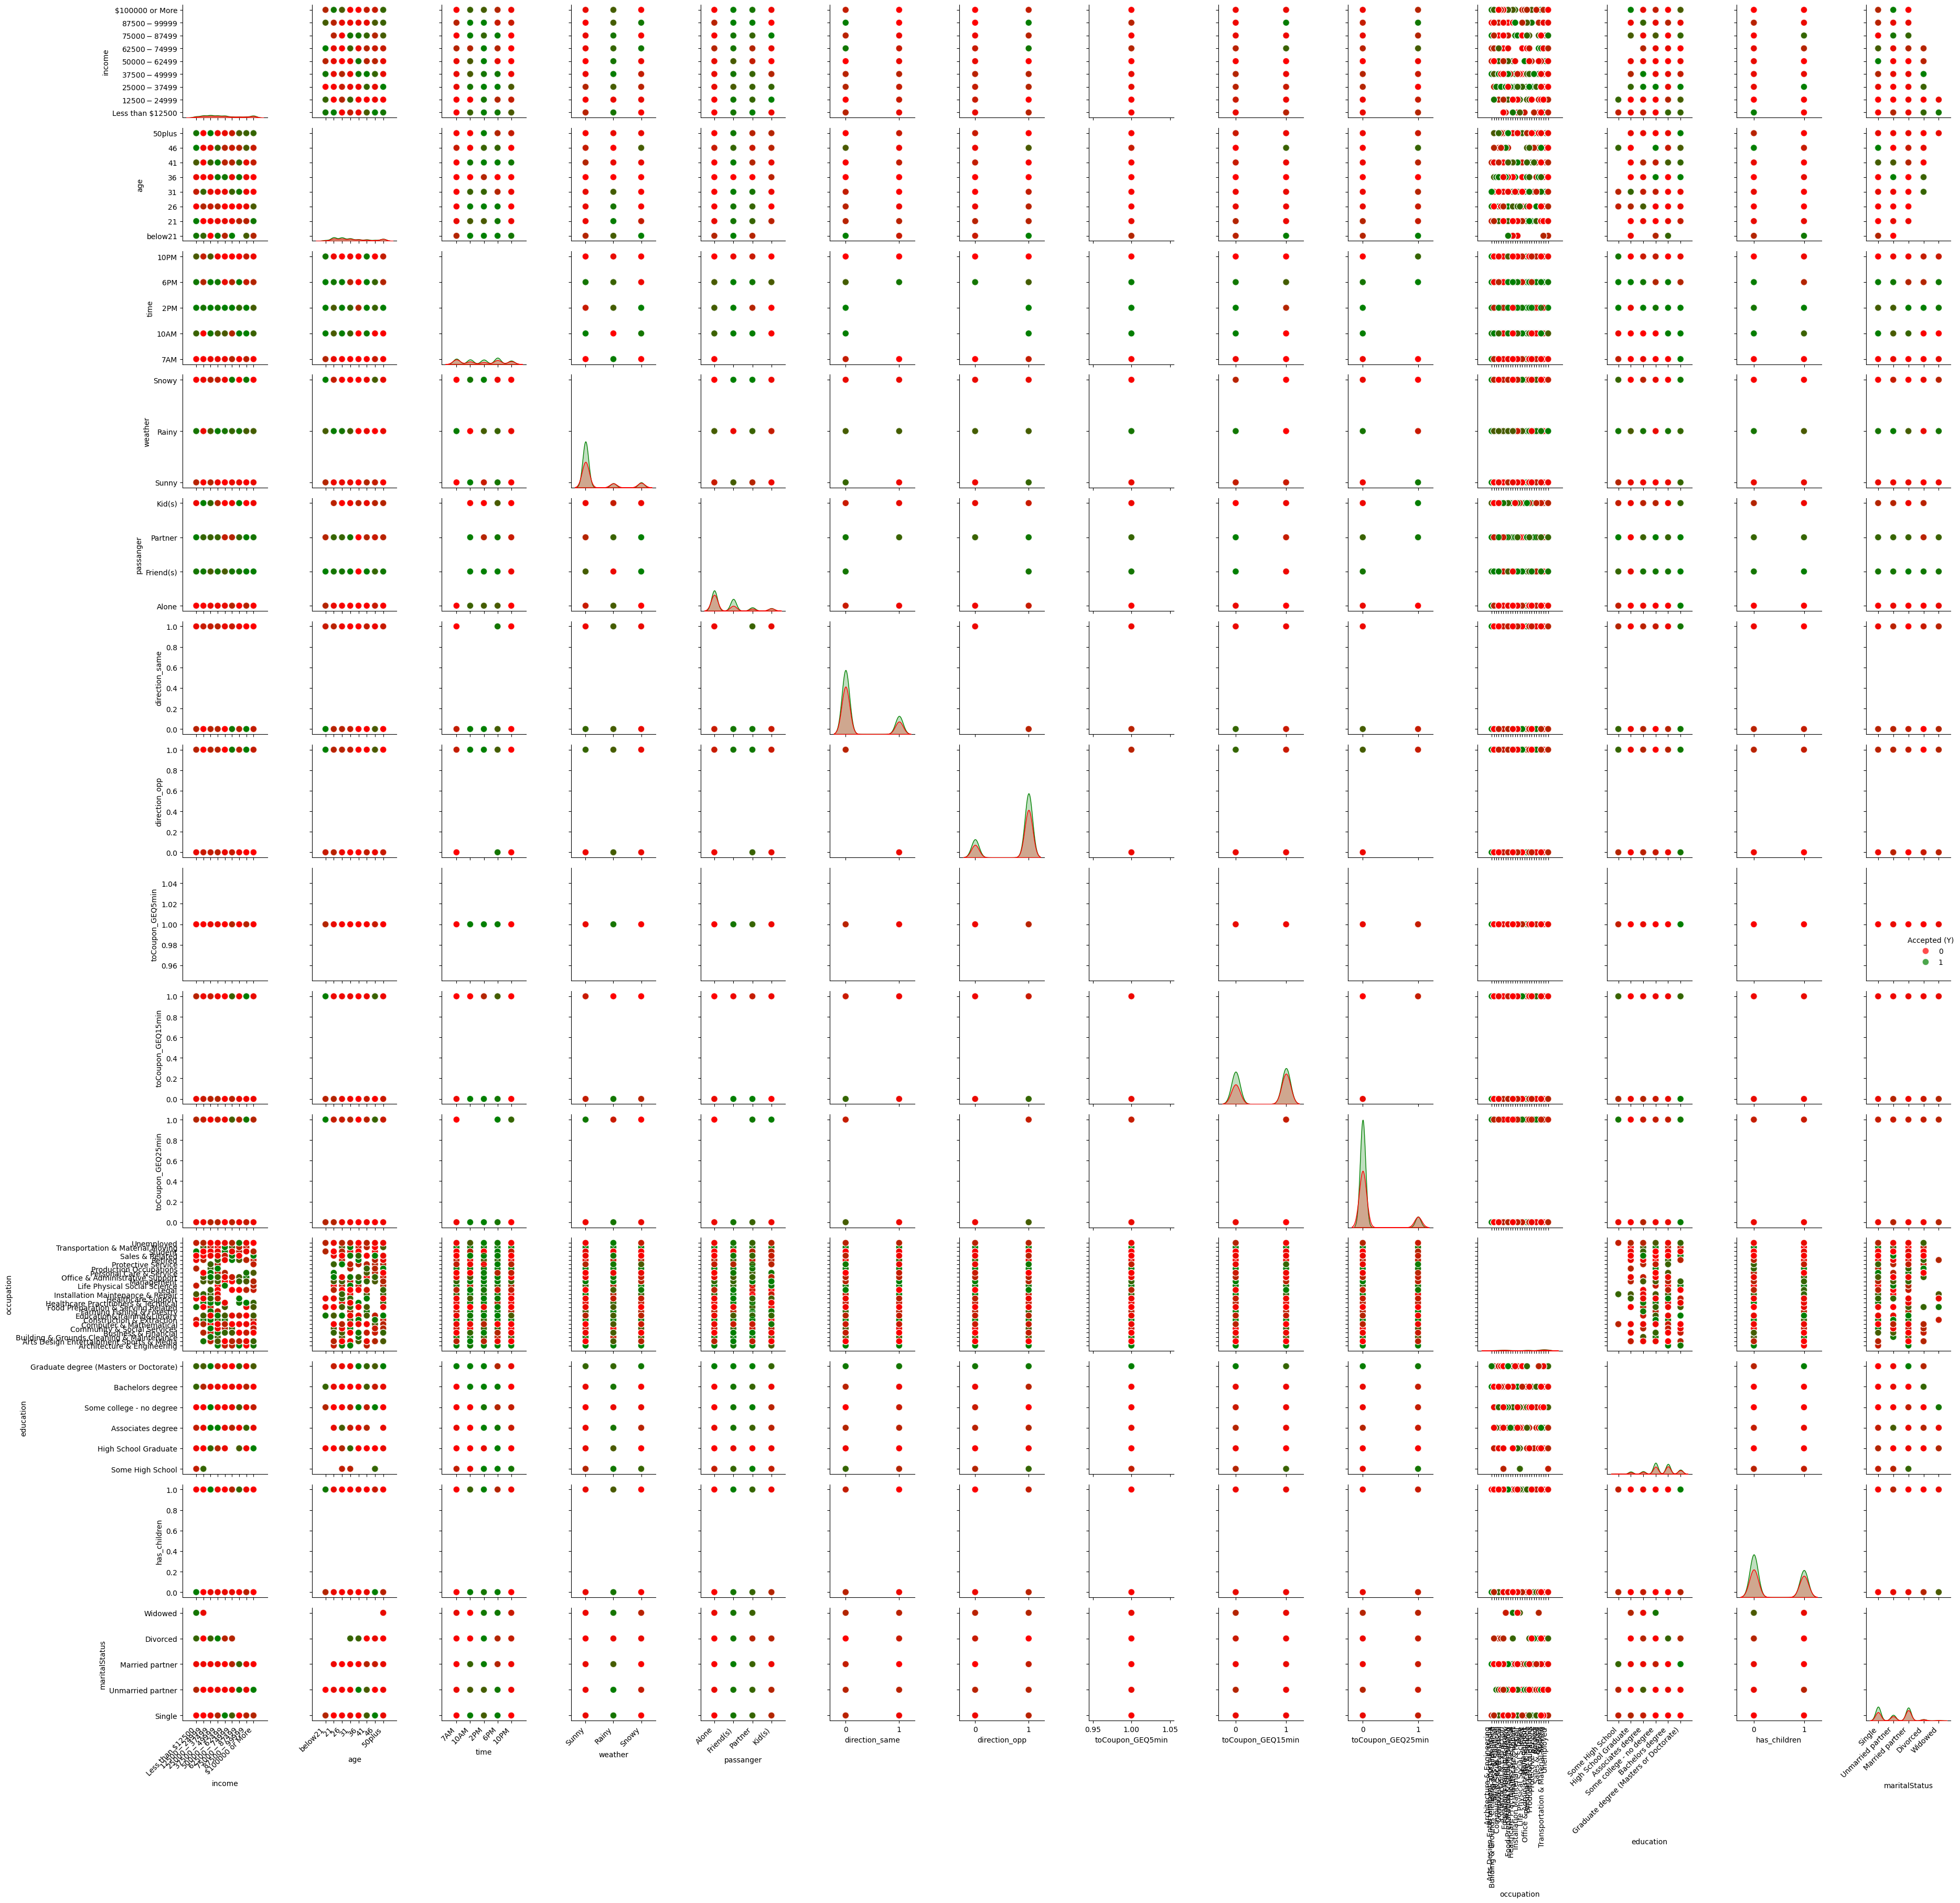

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings("ignore", message="Dataset has 0 variance", category=UserWarning)

# ---- requested variables ----
vars_grid = [
    'income','age','time','weather','passanger',
    'direction_same','direction_opp',
    'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min',
    'occupation','education','has_children','maritalStatus'
]

# 0) QUICK SANITY CHECK (prints any missing/misspelled columns)
missing = [c for c in vars_grid + ['Y'] if c not in data.columns]
print("Missing columns:", missing)  # should print [] before plotting

# ---- orders for categoricals ----
income_order = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
    '$100000 or More'
]
age_order     = ['below21','21','26','31','36','41','46','50plus']
time_order    = ['7AM','10AM','2PM','6PM','10PM']
weather_order = ['Sunny','Rainy','Snowy']
pass_order    = ['Alone','Friend(s)','Partner','Kid(s)']
edu_order     = ['Some High School','High School Graduate','Associates degree',
                 'Some college - no degree','Bachelors degree',
                 'Graduate degree (Masters or Doctorate)']
marital_order = ['Single','Unmarried partner','Married partner','Divorced','Widowed']
occ_order     = sorted(data['occupation'].dropna().unique())

orders = {
    'income': income_order,
    'age': age_order,
    'time': time_order,
    'weather': weather_order,
    'passanger': pass_order,          # dataset uses 'passanger'
    'education': edu_order,
    'maritalStatus': marital_order,
    'occupation': occ_order
}

# 1) cast ordered categoricals
for col, order in orders.items():
    if col in data.columns:
        data[col] = data[col].astype(CategoricalDtype(order, ordered=True))

# 2) numeric copy for plotting (categoricals -> integer codes)
num = data[['Y'] + vars_grid].copy()
for col in vars_grid:
    if col in orders:   # categorical -> codes
        num[col] = data[col].cat.codes   # 0..k-1 (respects order)

# 3) build the grid
palette = {1: 'green', 0: 'red'}
g = sns.PairGrid(num, vars=vars_grid, hue='Y', palette=palette, height=2.6)

g.map_offdiag(sns.scatterplot, s=80, alpha=0.7)
g.map_diag(sns.kdeplot, fill=True, alpha=0.25)  # simple diagonal; can change to hist if you prefer
g.add_legend(title='Accepted (Y)')

# 4) relabel ticks from codes back to category names (+ rotations)
def set_ticks(ax, var, axis='x'):
    if var in orders:
        labels = orders[var]
        ticks = np.arange(len(labels))
        if axis == 'x':
            ax.set_xticks(ticks)
            rot = 90 if var == 'occupation' else 45
            ax.set_xticklabels(labels, rotation=rot, ha='right')
        else:
            ax.set_yticks(ticks)
            ax.set_yticklabels(labels)

for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is None: 
            continue
        xvar = g.x_vars[j]
        yvar = g.y_vars[i]
        set_ticks(ax, xvar, 'x')
        set_ticks(ax, yvar, 'y')

plt.tight_layout()
plt.show()


In [ ]:
# Observations:

In [ ]:
# This was an attempt to see what other variables might have correlation.

In [ ]:
# It is hard to see the data and so hard to see patterns.